***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [81]:
CSV_PATH = './data/processed/Curso de Estatística/dados.csv'
df = pd.read_csv(CSV_PATH)

### Visualize o conteúdo do DataFrame

In [82]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [83]:
SALARIO_MINIMO = 788

INTERVALOS = [2, 5, 15, 25]

classes = [df['Renda'].min(),
          * [SALARIO_MINIMO * INTERVALOS[i] for i in range(len(INTERVALOS))],
          df['Renda'].max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [84]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [85]:
frequencia = pd.cut(df['Renda'],
       bins=classes,
       labels=labels,
       include_lowest=True).value_counts()
frequencia

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [86]:
percentual = pd.cut(df['Renda'],
       bins=classes,
       labels=labels,
       include_lowest=True).value_counts(normalize=True) * 100
percentual

Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [87]:
df_renda_freq_perc = pd.DataFrame({'Frequencia': frequencia,
              'Percentual': percentual}).sort_index(ascending=False)
df_renda_freq_perc

,Frequencia,Percentual
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0, 0.5, 'Renda')

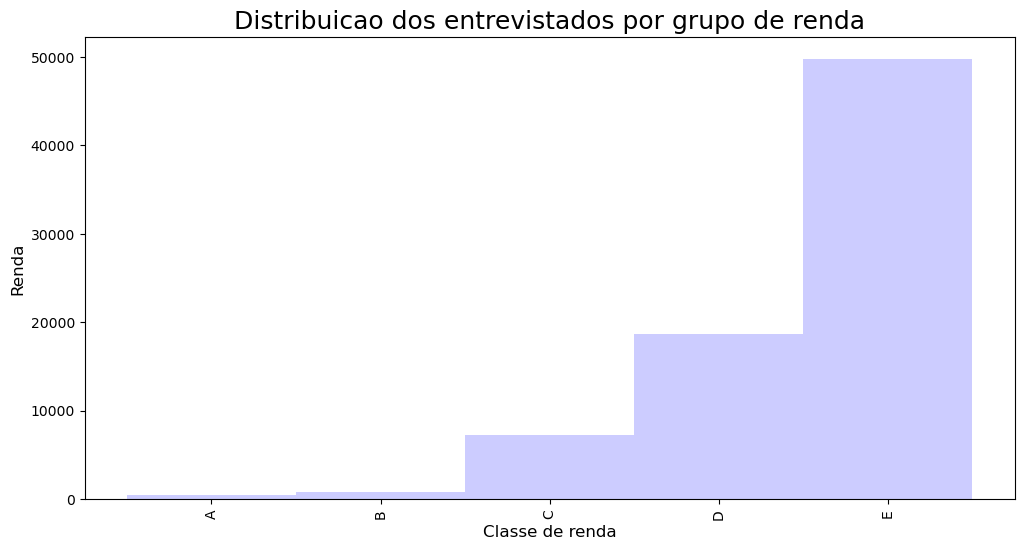

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = df_renda_freq_perc['Frequencia'].plot.bar(width=1,
                                          color='blue',
                                          alpha=.2)
ax.set_title('Distribuicao dos entrevistados por grupo de renda', fontdict={'size': 18})
ax.set_xlabel('Classe de renda', fontdict={'size': 12})
ax.set_ylabel('Renda', fontdict={'size': 12})

> ### Conclusões

* A quantidade de pessoas entrevistadas se concentra, majoritariamente, entre as classes D e E
* Existe um pequeno grupo de pessoas em classes mais altas (A, B e C) que, mesmo que somadas, pouco passam dos 10% do total.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

Text(0.5, 1.0, 'Altura')

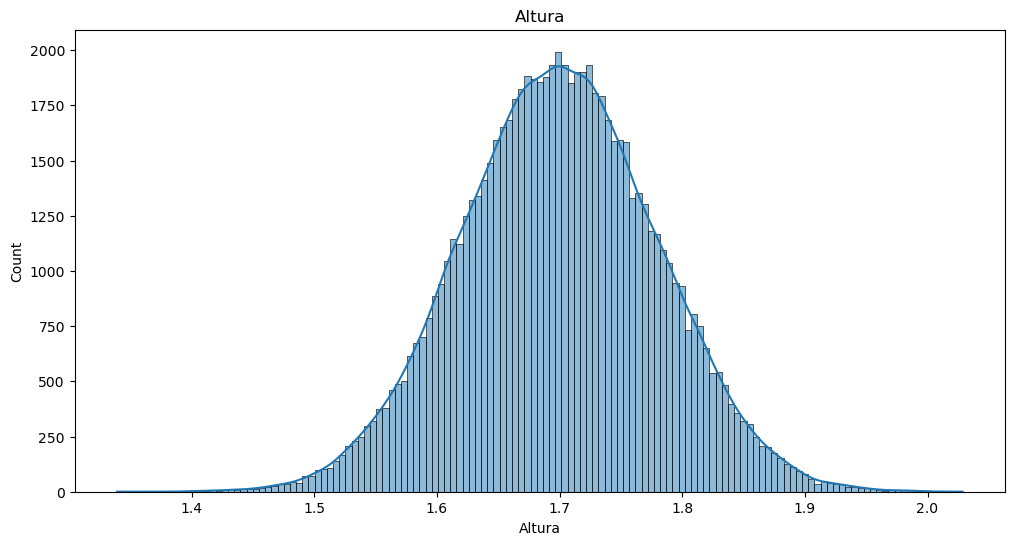

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Altura'], kde=True)

ax.set_title('Distribuicao das alturas dos entrevistados', fontdict={'size': 14})
ax.set_title('Nm. de entrevistados', fontdict={'size': 12})
ax.set_title('Altura', fontdict={'size': 12})

Text(0.5, 1.0, 'Anos de estudo')

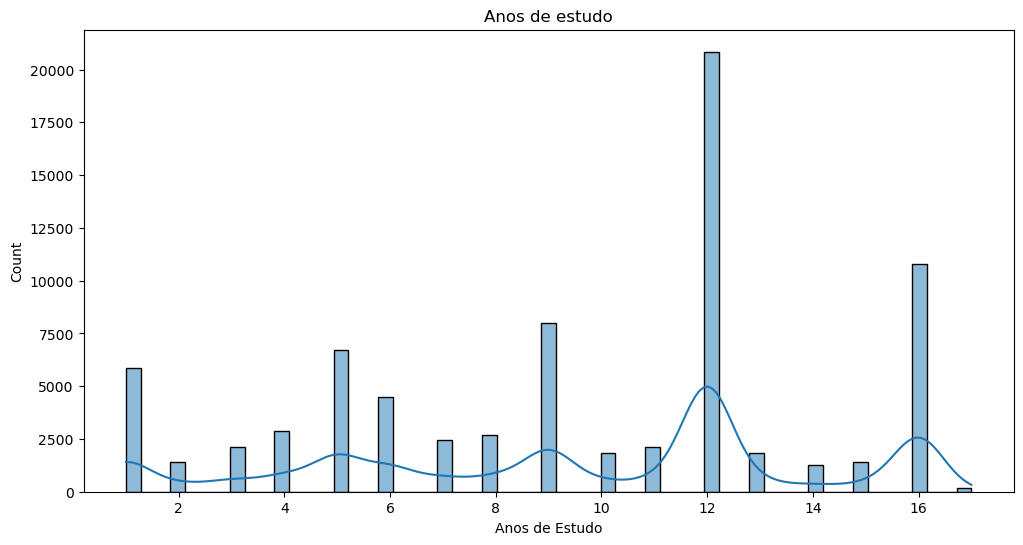

In [90]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Anos de Estudo'], kde=True)

ax.set_title('Distribuicao dos anos de estudo dos entrevistados', fontdict={'size': 14})
ax.set_title('Nm. de entrevistados', fontdict={'size': 12})
ax.set_title('Anos de estudo', fontdict={'size': 12})

> ### Conclusões

* Altura
  * Como esperado, a altura apresenta-se com uma distribuicao simetrica dentre os entrevistados.
* Anos de Estudo
  * O grafico apresenta diversos picos e vales. Contudo, tais ocorrencias sao somente constatadas em quantidades que remetem a conclusao de marcos educacionais - tais como ensino fundamental, medio, faculdade, especializacoes ou pos graduacoes (latu ou strictu sensu)
  * Interessante notar que, para alem daqueles que concluiram o ensino medio, aqueles que avancaram o ensino superior estao em maior quantidade daqueles que pararam antes dele.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0.5, 1.0, 'Faixa de renda')

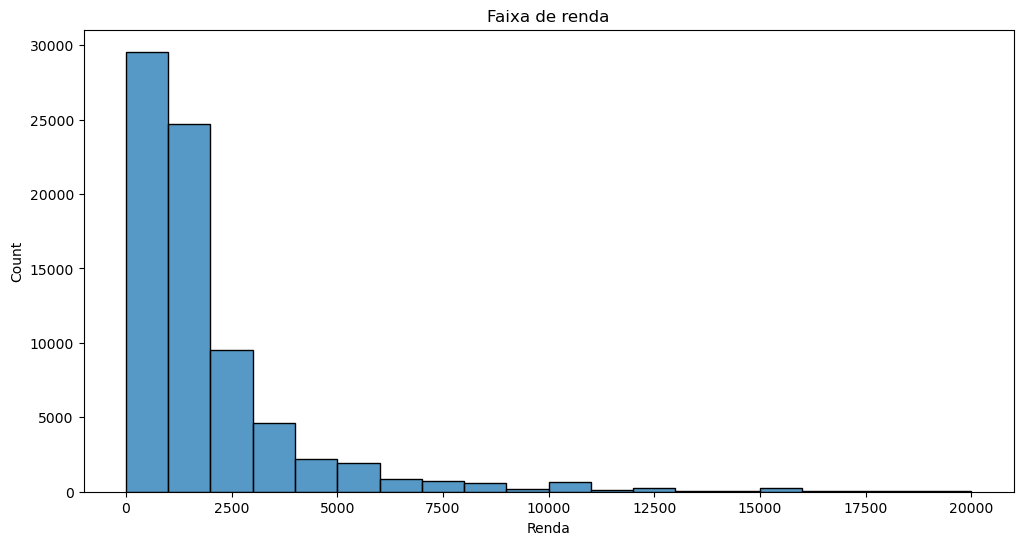

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df.query('Renda < 20000')['Renda'],
             bins=list(range(0, 20001, 1000)))

ax.set_title('Distribuicao de entrevistados com renda inferior a R$ 20.0000,00', fontdict={'size': 14})
ax.set_title('Nm. de entrevistados', fontdict={'size': 12})
ax.set_title('Faixa de renda', fontdict={'size': 12})

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [92]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [93]:
df['Sexo'].rename(sexo)

Masculino    0
Feminino     1
2            1
3            0
4            1
            ..
76835        1
76836        0
76837        0
76838        0
76839        0
Name: Sexo, Length: 76840, dtype: int64

In [94]:
cross_sex_cor_renda = pd.crosstab(df['Sexo'], df['Cor'],
            aggfunc='mean',
            values=df['Renda'])
cross_sex_cor_renda.rename(index=sexo, inplace=True)
cross_sex_cor_renda.rename(columns=cor, inplace=True)
cross_sex_cor_renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [95]:
cross_sex_cor_anos_estudo = pd.crosstab(df['Sexo'], df['Cor'],
                                        aggfunc='mean',
                                        values=df['Anos de Estudo'])
cross_sex_cor_anos_estudo.rename(index=sexo, inplace=True)
cross_sex_cor_anos_estudo.rename(columns=cor, inplace=True)
cross_sex_cor_anos_estudo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,7.875000,10.140353,8.514540,12.587234,8.329929
Feminino,9.108911,11.297578,9.522326,12.495726,9.520714


> ### Conclusões

* As cores Amarela e Branca, respectivamente, apresentam os maiores indicadores quanto ao tempo de estudo
  * Ao contrario de todos os outros casos, apenas na cor Amarela as Mulheres nao ultrapassam os homens em tempo de estudo
* O grupo Indigena e Masculino, dentre todos, aprensenta a menor media de contagem de anos de estudo
* Entre as cores Preta e Parda, existe uma certa similiaridade nos numeros de suas medias

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [96]:
df['Renda'].sum() / len(df)

2000.3831988547631

In [97]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [98]:
df_renda_mediana = df.sort_values('Renda').reset_index()

n = len(df_renda_mediana) / 2

((df_renda_mediana.loc[n - 1, 'Renda'] + df_renda_mediana.loc[n, 'Renda']) / 2)

1200.0

In [99]:
df['Renda'].median()

1200.0

### Obtenha a moda

In [100]:
df['Renda'].value_counts().index[0]

788

In [101]:
df['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [102]:
# (df['Renda'] - df['Renda'].mean()).abs()
df_renda_media = df['Renda'].mean()
df_renda_mad = df['Renda'] - df_renda_media
df_renda_mad = df_renda_mad.abs()
df_renda_mad

0        1200.383199
1         850.383199
2        1120.383199
3        1499.616801
4        1850.383199
            ...     
76835    1188.383199
76836     500.383199
76837     700.383199
76838     500.383199
76839    1100.383199
Name: Renda, Length: 76840, dtype: float64

### Obtenha a variância

In [103]:
# (((df['Renda'] - df['Renda'].mean()).abs()).pow(2)).sum() / (len(df) - 1)
df_renda_var = df_renda_mad.pow(2)
df_renda_var = df_renda_var.sum()
df_renda_var = df_renda_var / (len(df) - 1)
df_renda_var

11044906.006217021

In [104]:
df['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [105]:
# np.sqrt((((df['Renda'] - df['Renda'].mean()).abs()).pow(2)).sum() / (len(df) - 1))
np.sqrt(df_renda_var)

3323.3877303464037

In [106]:
df['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [79]:
cross_sex_cor_renda_mean_median_max = pd.crosstab(df['Sexo'], df['Cor'],
            aggfunc=['mean', 'median', 'max'],
            values=df['Renda'])
cross_sex_cor_renda_mean_median_max.rename(index=sexo, inplace=True)
cross_sex_cor_renda_mean_median_max.rename(columns=cor, inplace=True)
cross_sex_cor_renda_mean_median_max

mean                                                      \
Cor           Indígena       Branca        Preta      Amarela        Parda   
Sexo                                                                         
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425   
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516   

            median                                      max                 \
Cor       Indígena  Branca   Preta Amarela   Parda Indígena  Branca  Preta   
Sexo                                                                         
Masculino    797.5  1700.0  1200.0  2800.0  1200.0    10000  200000  50000   
Feminino     788.0  1200.0   800.0  1500.0   800.0   120000  100000  23000   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino   50000  100000  
Feminino    20000   30000

> ### Conclusões

* A maior renda, que inclusive apresenta-se como candidata a outlier, esta na cor Branca como Masculino
  * A segunda renda mais alta esta no grupo indigena, ainda que a media nao chegue nem perto - considerar, ainda, o tempo em anos de estudo
* Pelo valor da mediana do grupo indigena, poder-se-ia dizer que a distribuicao seria assimetrica com pico nas rendas mais baixas
* A cor Preta e Parda apresentam dados bem semelhantes

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [108]:
cross_sex_cor_renda_var_std = pd.crosstab(df['Sexo'], df['Cor'],
            aggfunc=['var', 'std'],
            values=df['Renda'])
cross_sex_cor_renda_var_std.rename(index=sexo, inplace=True)
cross_sex_cor_renda_var_std.rename(columns=cor, inplace=True)
cross_sex_cor_renda_var_std

var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                                  std                                        \
Cor               Parda      Indígena       Branca        Preta     Amarela   
Sexo                                                                          
Masculino  5.345747e+06   1204.093490  4750.791872  1936.309271  5740.82482   
Feminino   2.547960e+06  11957.498292  3251.013154  1349.799809  3731.17366   

                        
Cor              Parda  
Sexo                    
Masculino  2312.087184  
Feminino   1596.233048

> ### Conclusões

* Existe pouca variacao para os dados das cores Pretas e Pardas
* A cor Branca e Amarela apresentam grandes valores de desvio padrao - poderia indicar uma grande diferenca dentro do proprio grupo
* O Maior desvio padrao esta no grupo Indigena para o Feminino

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/tmp/ipykernel_27305/1536320631.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])


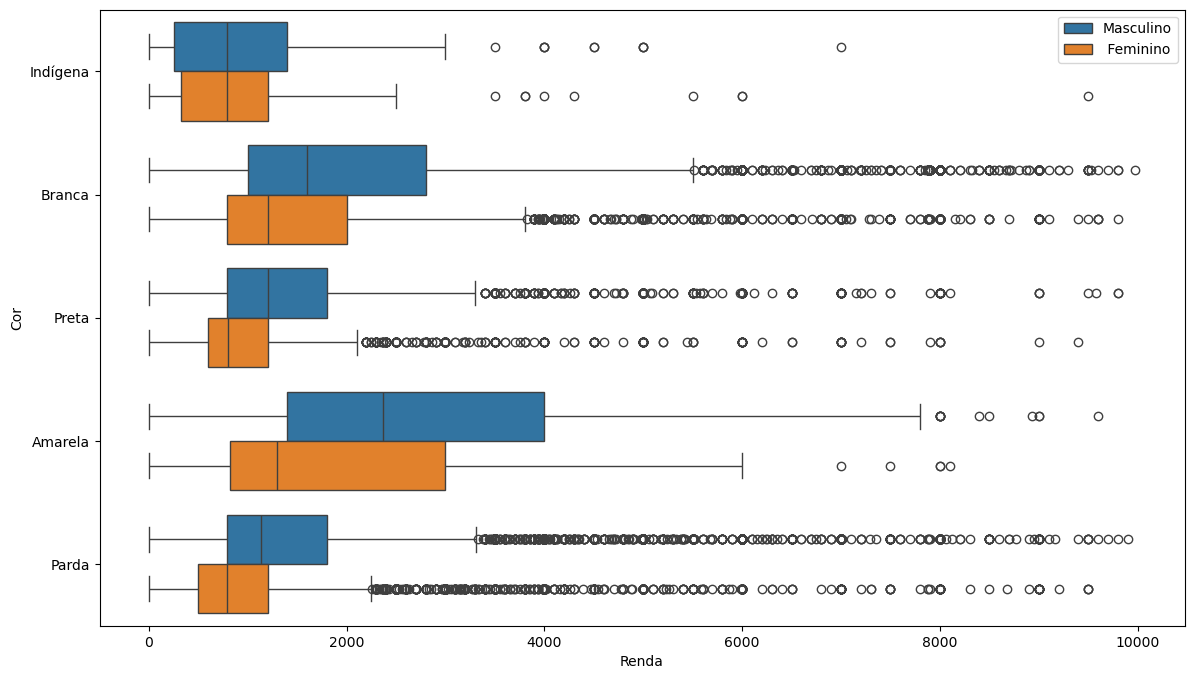

In [115]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(df.query('Renda < 10000'), 
            x='Renda',
            y='Cor',
            hue='Sexo', 
            orient='h')

ax.set_xlabel('Renda')
ax.set_ylabel('Cor')
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', ' Feminino'])

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [117]:
from scipy import stats

In [126]:
print('%.2f%% pessoas do estudo ganham igual ou menos que um salario minimo' 
      % stats.percentileofscore(df['Renda'], 788))

24.39% pessoas do estudo ganham igual ou menos que um salario minimo


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [123]:
df['Renda'].quantile([i / 100 for i in range(100)]).sum()

183845.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [150]:
pd.crosstab(df['Sexo'],
       df['Anos de Estudo'],
       values=df['Renda'],
       aggfunc=['mean', 'median', 'max', 'std']).rename(index=sexo).rename(columns=anos_de_estudo)

mean                          \
Anos de Estudo Sem instrução e menos de 1 ano       1 ano      2 anos   
Sexo                                                                    
Masculino                          799.494638  895.629047  931.178986   
Feminino                           516.201748  492.771987  529.911638   

                                                                    \
Anos de Estudo       3 anos       4 anos       5 anos       6 anos   
Sexo                                                                 
Masculino       1109.203862  1302.329283  1338.653218  1448.875419   
Feminino         546.853916   704.279111   781.389776   833.732824   

                                                      ...          std  \
Anos de Estudo       7 anos       8 anos      9 anos  ...       7 anos   
Sexo                                                  ...                
Masculino       1465.497940  1639.396667  1508.03885  ...  1419.708673   
Feminino         830.751004   933.615351   868.02170  ...   602.038029   

                                                                    \
Anos de Estudo       8 anos       9 anos      10 anos      11 anos   
Sexo                                                                 
Masculino       1515.583715  2137.664774  2078.609734  2676.538942   
Feminino         896.781213   973.221652   620.611907  1819.040417   

                                                                       \
Anos de Estudo      12 anos      13 anos      14 anos 15 anos ou mais   
Sexo                                                                    
Masculino       2268.081538  2797.116800  3987.214974     7447.613594   
Feminino        4851.833513  2053.789771  2064.083336     4212.770709   

                                 
Anos de Estudo Não determinados  
Sexo                             
Masculino            979.648745  
Feminino             459.985964  

[2 rows x 68 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/tmp/ipykernel_27305/3197324571.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(anos_de_estudo.values())


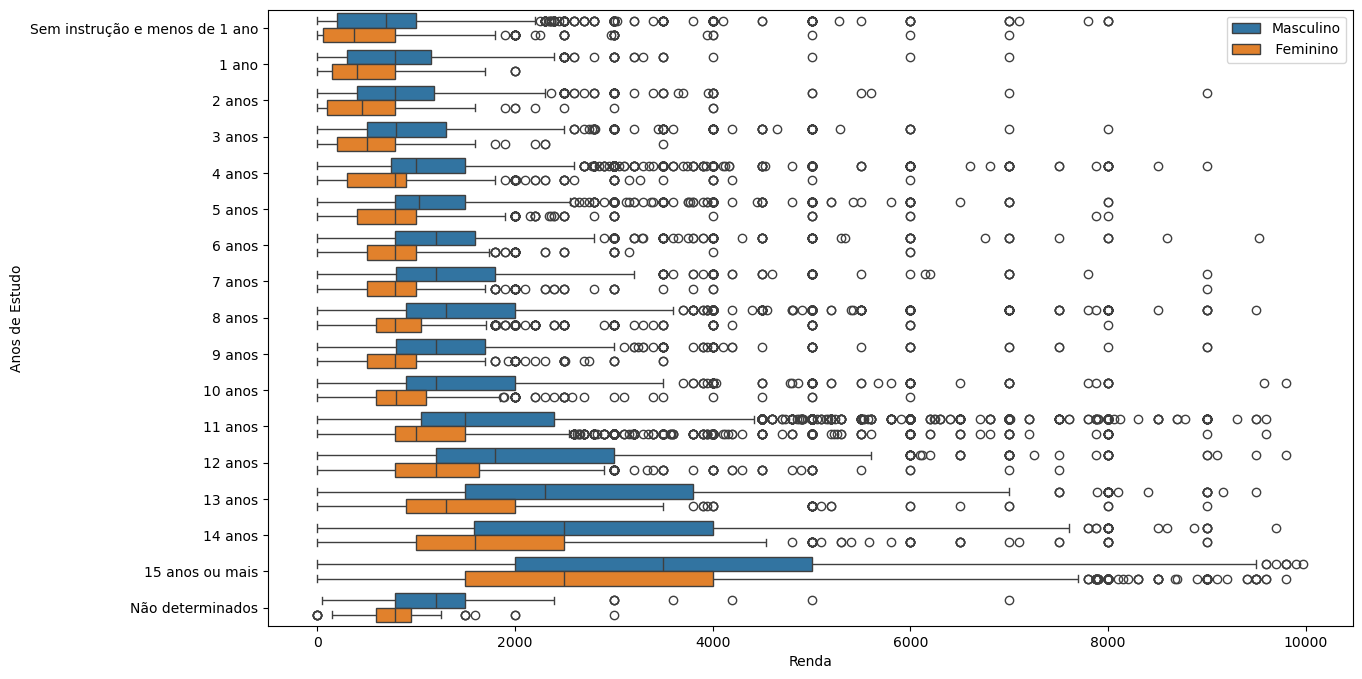

In [146]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(df.query('Renda < 10000'), 
            x='Renda',
            y='Anos de Estudo',
            hue='Sexo',
            orient='h')

ax.set_xlabel('Renda')
ax.set_ylabel('Anos de Estudo')
ax.set_yticklabels(anos_de_estudo.values())

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', ' Feminino'])

/tmp/ipykernel_27305/4193477718.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(anos_de_estudo.values())


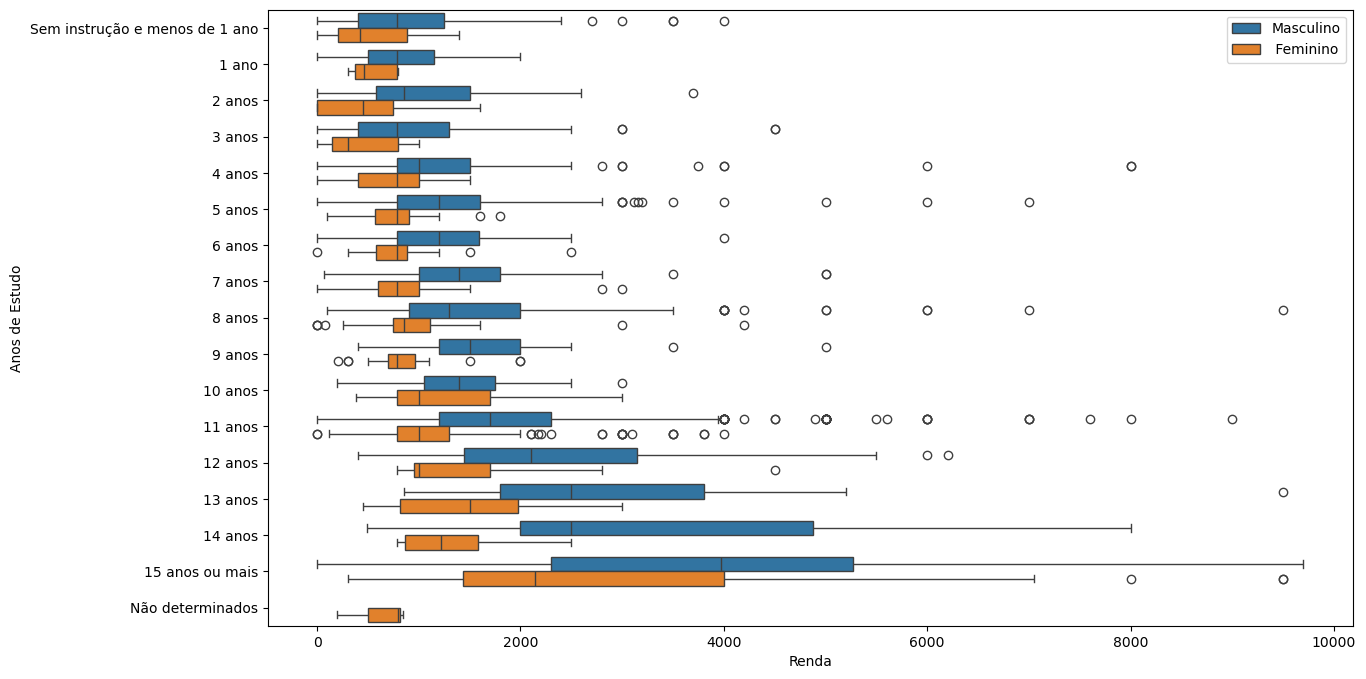

In [144]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(df.query('Renda < 10000 and Idade == 40'), 
            x='Renda',
            y='Anos de Estudo',
            hue='Sexo',
            orient='h')

ax.set_xlabel('Renda')
ax.set_ylabel('Anos de Estudo')
ax.set_yticklabels(anos_de_estudo.values())

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', ' Feminino'])

/tmp/ipykernel_27305/2922186405.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(anos_de_estudo.values())


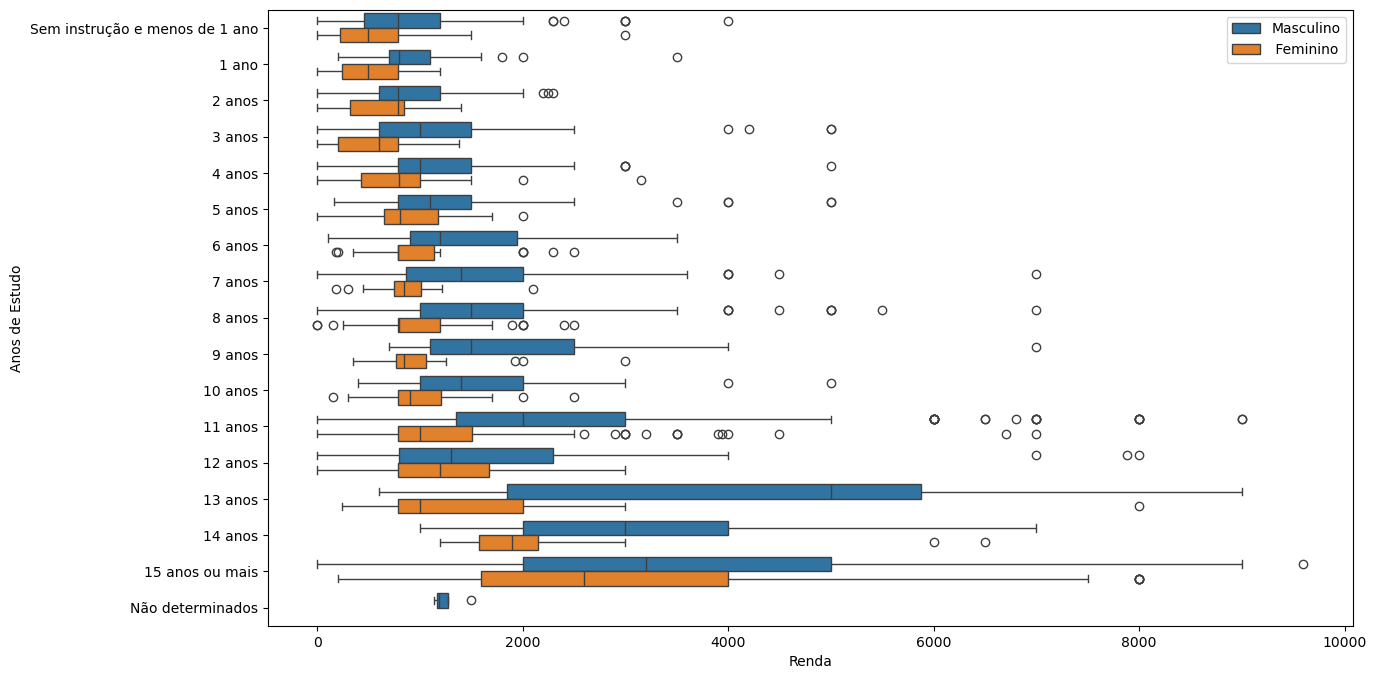

In [145]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(df.query('Renda < 10000 and Idade == 50'), 
            x='Renda',
            y='Anos de Estudo',
            hue='Sexo',
            orient='h')

ax.set_xlabel('Renda')
ax.set_ylabel('Anos de Estudo')
ax.set_yticklabels(anos_de_estudo.values())

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', ' Feminino'])

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [136]:
df.groupby('UF')['Renda'].agg(['mean', 'median', 'max', 'std']).rename(index=uf)

,mean,median,max,std
UF,,,,
Rondônia,1789.761223,1200.0,50000,2406.161161
Acre,1506.091782,900.0,30000,2276.233415
Amazonas,1445.130100,900.0,22000,1757.935591
Roraima,1783.588889,1000.0,20000,2079.659238
Pará,1399.076871,850.0,50000,2053.779555
Amapá,1861.353516,1200.0,15580,2020.688632
Tocantins,1771.094946,1000.0,60000,2934.590741
Maranhão,1019.432009,700.0,30000,1887.816905
Piauí,1074.550784,750.0,40000,2373.355726


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

/tmp/ipykernel_27305/2998601980.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(uf.values())


[Text(0, 0, 'Rondônia'),
 Text(0, 1, 'Acre'),
 Text(0, 2, 'Amazonas'),
 Text(0, 3, 'Roraima'),
 Text(0, 4, 'Pará'),
 Text(0, 5, 'Amapá'),
 Text(0, 6, 'Tocantins'),
 Text(0, 7, 'Maranhão'),
 Text(0, 8, 'Piauí'),
 Text(0, 9, 'Ceará'),
 Text(0, 10, 'Rio Grande do Norte'),
 Text(0, 11, 'Paraíba'),
 Text(0, 12, 'Pernambuco'),
 Text(0, 13, 'Alagoas'),
 Text(0, 14, 'Sergipe'),
 Text(0, 15, 'Bahia'),
 Text(0, 16, 'Minas Gerais'),
 Text(0, 17, 'Espírito Santo'),
 Text(0, 18, 'Rio de Janeiro'),
 Text(0, 19, 'São Paulo'),
 Text(0, 20, 'Paraná'),
 Text(0, 21, 'Santa Catarina'),
 Text(0, 22, 'Rio Grande do Sul'),
 Text(0, 23, 'Mato Grosso do Sul'),
 Text(0, 24, 'Mato Grosso'),
 Text(0, 25, 'Goiás'),
 Text(0, 26, 'Distrito Federal')]

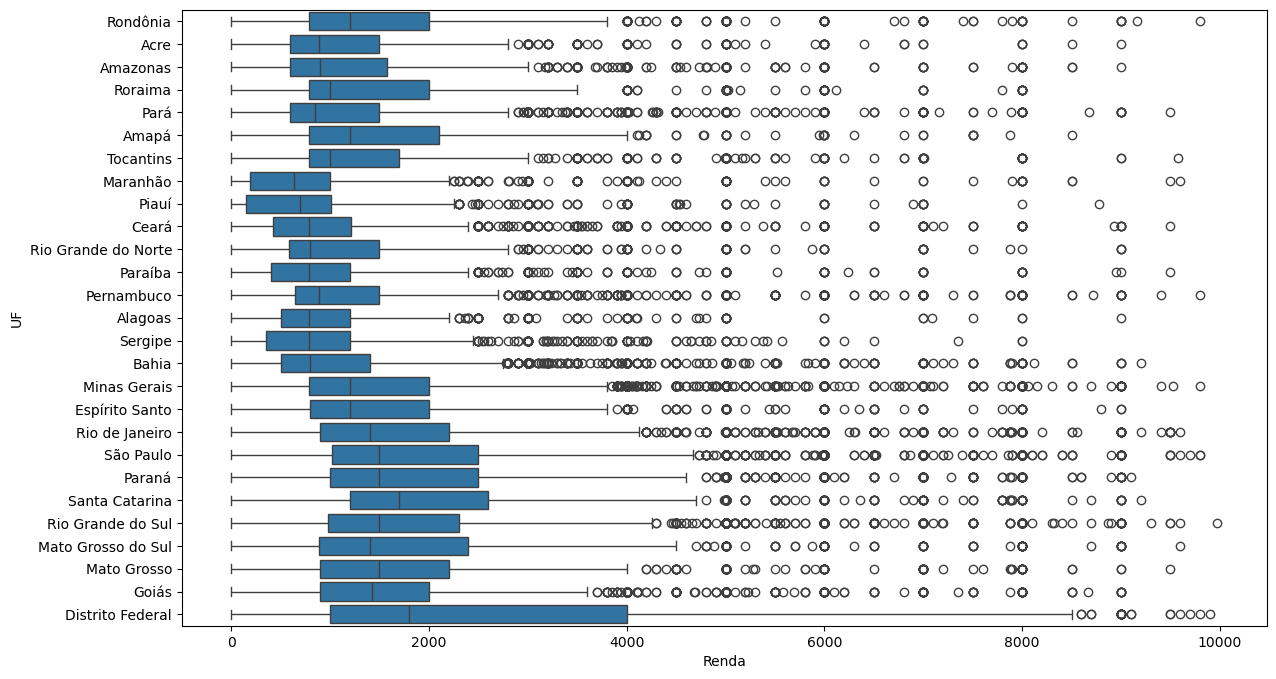

In [132]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(df.query('Renda < 10000'), 
            x='Renda',
            y='UF', 
            orient='h')

ax.set_xlabel('Renda')
ax.set_ylabel('UF')
ax.set_yticklabels(uf.values())

> ### Conclusões

Escreva suas conclusões aqui...